In [1]:
%matplotlib inline
%matplotlib notebook
import tqdm, copy
import random, os
import pandas as pd
from tqdm import trange
import matplotlib.pyplot as plt
from collections import defaultdict
from overcooked_ai_py.utils import save_pickle
from human_aware_rl.utils import set_global_seed
from human_aware_rl.human.process_dataframes import *
from human_aware_rl.static import *
import pickle as pkl

set_global_seed(1884)

In [2]:
import ast
import json

# Define Helper Functions

In [3]:
def json_eval(s):
    json_acceptable_string = s.replace("'", "\"")
    d = json.loads(json_acceptable_string)
    return d

# Import Cleaned Data

In [4]:
hh_all_2020_file = '/Users/michellezhao/Documents/overcooked_research/human_aware_rl/human_aware_rl/static/human_data/cleaned/2020_hh_trials_all.pickle'
hh_all_2019_file = '/Users/michellezhao/Documents/overcooked_research/human_aware_rl/human_aware_rl/static/human_data/cleaned/2019_hh_trials_all.pickle'






In [5]:
with open(hh_all_2020_file,'rb') as file:
    humans_2020_file = pkl.load(file)
    
with open(hh_all_2019_file,'rb') as file:
    humans_2019_file = pkl.load(file)



In [6]:
humans_2020_file.to_csv('humans_all_2020.csv')

In [7]:
humans_2019_file.to_csv('humans_all_2019.csv')

In [8]:
humans_2020_file.columns

Index(['state', 'joint_action', 'reward', 'time_left', 'score', 'time_elapsed',
       'cur_gameloop', 'layout', 'layout_name', 'trial_id', 'player_0_id',
       'player_1_id', 'player_0_is_human', 'player_1_is_human',
       'cur_gameloop_total', 'score_total', 'button_press',
       'button_press_total', 'timesteps_since_interact',
       'button_presses_per_timstep'],
      dtype='object')

In [9]:
old_trials = humans_2019_file
new_trials = humans_2020_file

In [10]:
all_trials = pd.concat([old_trials, new_trials])

In [12]:
all_trials.columns

Index(['Unnamed: 0', 'cur_gameloop', 'joint_action', 'layout', 'layout_name',
       'reward', 'score', 'state', 'time_elapsed', 'time_left', 'trial_id',
       'player_0_is_human', 'player_1_is_human', 'player_0_id', 'player_1_id',
       'cur_gameloop_total', 'score_total', 'button_press',
       'button_press_total', 'timesteps_since_interact',
       'button_presses_per_timstep'],
      dtype='object')

In [15]:
len(all_trials['trial_id'].unique())

373

# Process New Trials

In [23]:
all_trials = old_trials

In [24]:
all_trials.columns

Index(['Unnamed: 0', 'cur_gameloop', 'joint_action', 'layout', 'layout_name',
       'reward', 'score', 'state', 'time_elapsed', 'time_left', 'trial_id',
       'player_0_is_human', 'player_1_is_human', 'player_0_id', 'player_1_id',
       'cur_gameloop_total', 'score_total', 'button_press',
       'button_press_total', 'timesteps_since_interact',
       'button_presses_per_timstep'],
      dtype='object')

In [25]:
layouts_list = all_trials['layout_name'].unique()
print('layouts_list', layouts_list)


layouts_list ['cramped_room' 'asymmetric_advantages' 'coordination_ring' 'random3'
 'random0']


In [26]:
num_trials = len(all_trials['trial_id'].unique())
print('num_trials', num_trials)


num_trials 86


In [27]:
# Compute num trials per environment
trials_per_environment = {}
for layout_name in layouts_list:
    n_trials = len(all_trials[all_trials['layout_name']==layout_name]['trial_id'].unique())
    print(layout_name, n_trials)
    trials_per_environment[layout_name] = n_trials


cramped_room 19
asymmetric_advantages 19
coordination_ring 18
random3 18
random0 12


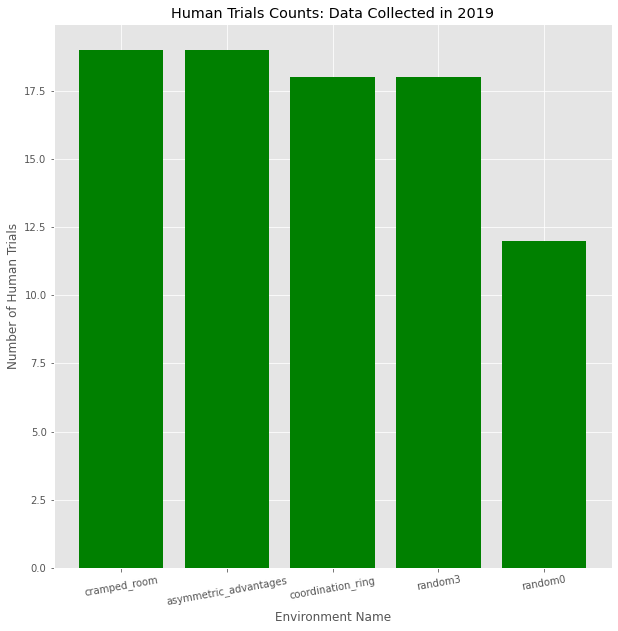

In [32]:
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(10,10))
x = list(trials_per_environment.keys())
energy = list(trials_per_environment.values())

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green')
plt.xlabel("Environment Name")
plt.ylabel("Number of Human Trials")
plt.title("Human Trials Counts: Data Collected in 2019")

plt.xticks(x_pos, x, rotation=10)
# ax.set_xticklabels( range(0,N,10), rotation=45 )

plt.show()



num_trials 86
cramped_room 19
asymmetric_advantages 19
coordination_ring 18
random3 18
random0 12


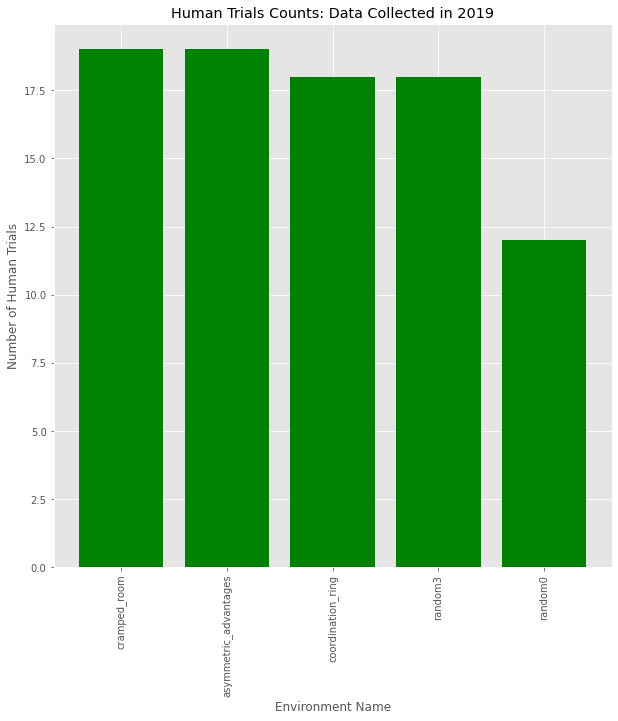

In [29]:
layouts_list = old_trials['layout_name'].unique()
num_trials = len(old_trials['trial_id'].unique())
print('num_trials', num_trials)


# Compute num trials per environment
trials_per_environment = {}
for layout_name in layouts_list:
    n_trials = len(old_trials[old_trials['layout_name']==layout_name]['trial_id'].unique())
    print(layout_name, n_trials)
    trials_per_environment[layout_name] = n_trials


plt.figure(figsize=(10,10))
x = list(trials_per_environment.keys())
energy = list(trials_per_environment.values())

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green')
plt.xlabel("Environment Name")
plt.ylabel("Number of Human Trials")
plt.title("Human Trials Counts: Data Collected in 2019")

plt.xticks(x_pos, x, rotation=90)
# ax.set_xticklabels( range(0,N,10), rotation=45 )

plt.show()



In [13]:
# for index, row in df.iterrows():
#     print(row['c1'], row['c2'])


In [14]:
layout = eval(new_trials[new_trials['layout_name']=='counter_circuit']['layout'].to_numpy()[0])


[['X' 'X' 'X' 'P' 'D' 'P' 'X' 'X' 'X']
 ['X' ' ' ' ' ' ' ' ' ' ' ' ' ' ' 'X']
 ['X' ' ' 'X' 'X' 'X' 'X' 'X' ' ' 'X']
 ['X' ' ' ' ' ' ' ' ' ' ' ' ' ' ' 'X']
 ['X' 'X' 'X' 'O' 'S' 'T' 'X' 'X' 'X']]


<IPython.core.display.Javascript object>


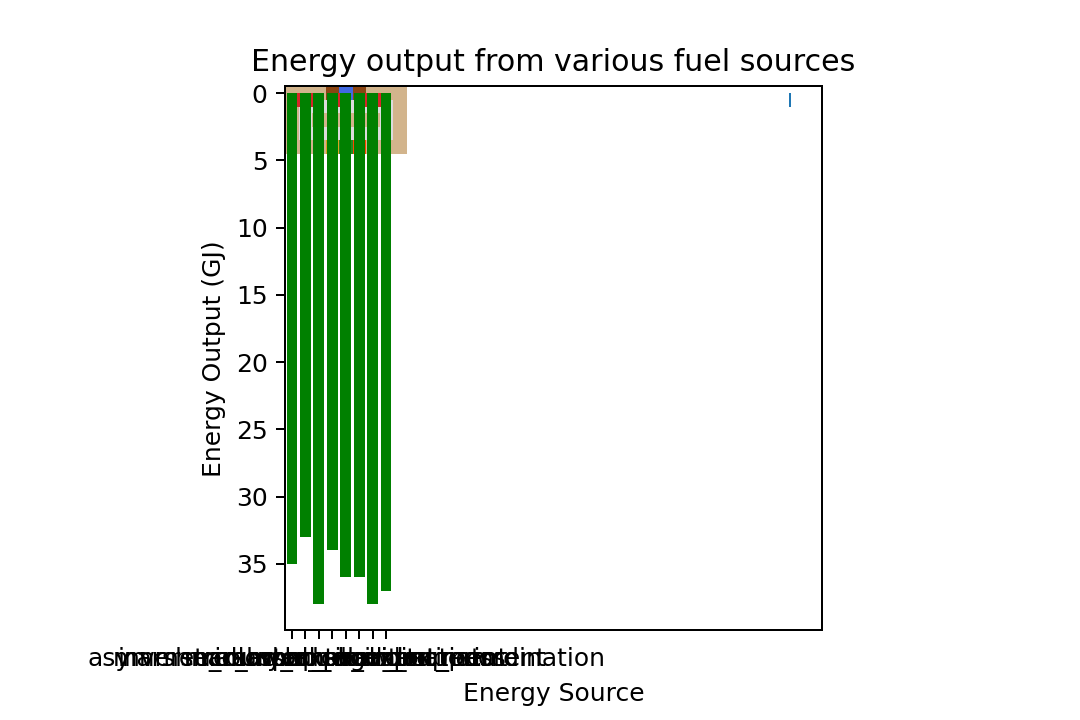

In [19]:
layout = np.array(layout)
print(layout)

def display_layout(layout):
    grid_display = np.zeros((layout.shape[0], layout.shape[1], 3))
    for i in range(layout.shape[0]):
        for j in range(layout.shape[1]):
            # Floor = gray
            grid_display[i,j,:] = [220,220,220]
            if layout[i,j] == 'X':
                # Counter = Tan
                grid_display[i,j,:] = [210,180,140]
            if layout[i,j] == 'P':
                # Pots = brown
                grid_display[i,j,:] = [139,69,19]
            if layout[i,j] == 'S':
                # Serve = Green
                grid_display[i,j,:] = [34,139,34]
            if layout[i,j] == 'O':
                # Onion = Yellow
                grid_display[i,j,:] = [218,165,32]
            if layout[i,j] == 'D':
                # Dishes = Blue
                grid_display[i,j,:] = [65,105,225]
            if layout[i,j] == 'T':
                # Tomato = Blue
                grid_display[i,j,:] = [255,69,0]
                
    plt.imshow(grid_display.astype(np.uint8), vmin=0, vmax=255)
    plt.show()
                
    
display_layout(layout)

# Figure out directions of Turning

In [20]:
layout_trials = new_trials[new_trials['layout_name']=='counter_circuit']['trial_id'].unique()

trial_df = new_trials[new_trials['trial_id']=='A107RJSS561Y7R:3Q5ZZ9ZEVTMZAGUKW8V7VOFCWDI85G1604703020.4018524']


In [21]:
trial_df.columns

Index(['state', 'joint_action', 'reward', 'time_left', 'score', 'time_elapsed',
       'cur_gameloop', 'layout', 'layout_name', 'trial_id', 'player_0_id',
       'player_1_id', 'player_0_is_human', 'player_1_is_human',
       'cur_gameloop_total', 'score_total', 'button_press',
       'button_press_total', 'timesteps_since_interact',
       'button_presses_per_timstep'],
      dtype='object')

In [24]:
state_data = trial_df['state'].to_numpy()

In [59]:
counter = 0
for i in range(1, len(state_data)):
    prev_state_x = json_eval(state_data[i-1])
    state_x = json_eval(state_data[i])
    p1_data = state_x['players'][0]
    p2_data = state_x['players'][1]
    
    if p1_data['held_object'] is not None:
        print('previous 1 location:::', prev_state_x['players'][0])
        print('p1_data:::', p1_data)
        print()
        counter += 1
        if counter > 20:
            break
    
    if p2_data['held_object'] is not None:
        print('previous 2 location:::', prev_state_x['players'][1])
        print('p2_data:::', p2_data)
        print()
        counter += 1
        if counter > 20:
            break
    
    
    

previous 1 location::: {'position': [3, 3], 'orientation': [0, 1], 'held_object': None}
p1_data::: {'position': [3, 3], 'orientation': [0, 1], 'held_object': {'name': 'onion', 'position': [3, 3]}}

previous 1 location::: {'position': [3, 3], 'orientation': [0, 1], 'held_object': {'name': 'onion', 'position': [3, 3]}}
p1_data::: {'position': [2, 3], 'orientation': [-1, 0], 'held_object': {'name': 'onion', 'position': [2, 3]}}

previous 2 location::: {'position': [5, 3], 'orientation': [0, 1], 'held_object': None}
p2_data::: {'position': [5, 3], 'orientation': [0, 1], 'held_object': {'name': 'tomato', 'position': [5, 3]}}

previous 1 location::: {'position': [2, 3], 'orientation': [-1, 0], 'held_object': {'name': 'onion', 'position': [2, 3]}}
p1_data::: {'position': [2, 3], 'orientation': [-1, 0], 'held_object': {'name': 'onion', 'position': [2, 3]}}

previous 2 location::: {'position': [5, 3], 'orientation': [0, 1], 'held_object': {'name': 'tomato', 'position': [5, 3]}}
p2_data::: {'pos

In [50]:
for i in range(len(state_data)):
    state_x = json_eval(state_data[i])
    p1_data = state_x['players'][0]
    p2_data = state_x['players'][1]
    objects = state_x['objects']
    if objects['is_ready'] is True:
        print('state_x', state_x)
        break
    
    
    
    
    

TypeError: list indices must be integers or slices, not str

In [55]:
for i in range(len(state_data)):
    state_x = json_eval(state_data[i])
    objects = state_x['objects']
    if len(objects) == 2:
        print((objects))
#     print(state_x['objects'])
    

[{'name': 'soup', 'position': [3, 0], '_ingredients': [{'name': 'tomato', 'position': [3, 0]}, {'name': 'onion', 'position': [3, 0]}], 'cooking_tick': 13, 'is_cooking': True, 'is_ready': False, 'is_idle': False, 'cook_time': 22, '_cooking_tick': 13}, {'name': 'soup', 'position': [5, 0], '_ingredients': [{'name': 'tomato', 'position': [5, 0]}], 'cooking_tick': -1, 'is_cooking': False, 'is_ready': False, 'is_idle': True, 'cook_time': -1, '_cooking_tick': -1}]
[{'name': 'soup', 'position': [3, 0], '_ingredients': [{'name': 'tomato', 'position': [3, 0]}, {'name': 'onion', 'position': [3, 0]}], 'cooking_tick': 14, 'is_cooking': True, 'is_ready': False, 'is_idle': False, 'cook_time': 22, '_cooking_tick': 14}, {'name': 'soup', 'position': [5, 0], '_ingredients': [{'name': 'tomato', 'position': [5, 0]}], 'cooking_tick': -1, 'is_cooking': False, 'is_ready': False, 'is_idle': True, 'cook_time': -1, '_cooking_tick': -1}]
[{'name': 'soup', 'position': [3, 0], '_ingredients': [{'name': 'tomato', 'p

## Orientations Mapping

## Positions = (x,y)

1. 'orientation': [0, 1] = South
2. 'orientation': [-1, 0] = West
3. 'orientation': [1, 0] = East
4. 'orientation': [0, -1] = North
